# Exploration et Visualisation de données avec Matplotlib et Pandas

## Crédits :
Esteban MARTEL  
Lucas BLANC  
Arthur ANNARUMMA  
Baptisme BILLA  

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('data.csv', sep=';')
data.head()

,annee,UAI,libelle,region,dont_apprentis_eple,taux_poursuite_etudes,taux_emploi_6_mois,taux_emploi_6_mois_attendu,va_emploi_6_mois,taux_emploi_12_mois,taux_emploi_18_mois,taux_emploi_24_mois,Part en poursuite d'études,Part en emploi 6 mois après la sortie,Part des autres situations
0,cumul 2019-2020,0011010T,Lycée professionnel du Bugey,AUVERGNE-RHONE-ALPES,ensemble,44.0,34.0,32.0,2.0,38.0,NaN,NaN,NaN,NaN,NaN
1,cumul 2019-2020,0020050U,Lycée d'enseignement général et technologique ...,HAUTS-DE-FRANCE,dont apprentis,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cumul 2019-2020,0020052W,Lycée professionnel Colard Noël - Lycée des mé...,HAUTS-DE-FRANCE,dont élèves en voie pro sco,49.0,26.0,25.0,1.0,32.0,NaN,NaN,NaN,NaN,NaN
3,cumul 2019-2020,0020078Z,Lycée professionnel Julie Daubie,HAUTS-DE-FRANCE,dont élèves en voie pro sco,49.0,15.0,22.0,-7.0,24.0,NaN,NaN,NaN,NaN,NaN
4,cumul 2019-2020,0060027X,Lycée professionnel Pierre et Marie Curie - Ly...,PROVENCE-ALPES-COTE D'AZUR,dont élèves en voie pro sco,41.0,20.0,31.0,-11.0,28.0,NaN,NaN,NaN,NaN,NaN


In [8]:
data.columns

Index(['annee', 'UAI', 'libelle', 'region', 'dont_apprentis_eple',
       'taux_poursuite_etudes', 'taux_emploi_6_mois',
       'taux_emploi_6_mois_attendu', 'va_emploi_6_mois', 'taux_emploi_12_mois',
       'taux_emploi_18_mois', 'taux_emploi_24_mois',
       'Part en poursuite d'études', 'Part en emploi 6 mois après la sortie',
       'Part des autres situations'],
      dtype='object')

In [9]:
colonnes_a_garder = ['annee', 'region', 'taux_poursuite_etudes', 'taux_emploi_6_mois','taux_emploi_12_mois']
data = data[colonnes_a_garder]

In [10]:
data.head()

,annee,region,taux_poursuite_etudes,taux_emploi_6_mois,taux_emploi_12_mois
0,cumul 2019-2020,AUVERGNE-RHONE-ALPES,44.0,34.0,38.0
1,cumul 2019-2020,HAUTS-DE-FRANCE,30.0,NaN,NaN
2,cumul 2019-2020,HAUTS-DE-FRANCE,49.0,26.0,32.0
3,cumul 2019-2020,HAUTS-DE-FRANCE,49.0,15.0,24.0
4,cumul 2019-2020,PROVENCE-ALPES-COTE D'AZUR,41.0,20.0,28.0


In [11]:
data.describe()

,taux_poursuite_etudes,taux_emploi_6_mois,taux_emploi_12_mois
count,12847.000000,12000.000000,12001.000000
mean,44.623648,43.743167,51.566286
std,12.279015,15.238861,14.613314
min,0.000000,2.000000,3.000000
25%,38.000000,33.000000,41.000000
50%,46.000000,43.000000,51.000000
75%,52.000000,54.000000,61.000000
max,100.000000,100.000000,100.000000


In [12]:
#liste des periodes
data['annee'] = pd.Categorical(data['annee'], categories=data['annee'].unique(), ordered=True)
periodes = data['annee'].unique()

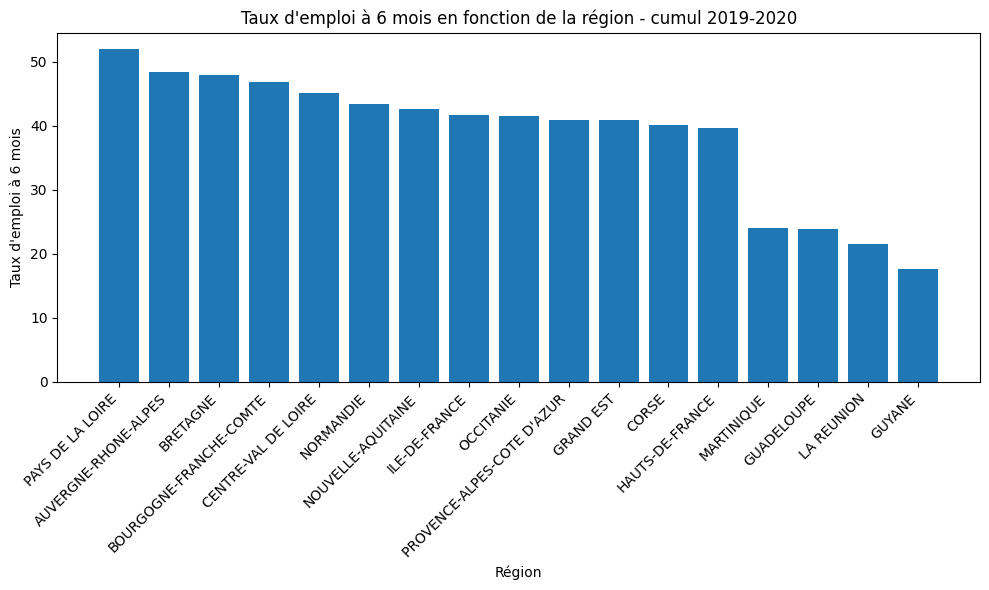

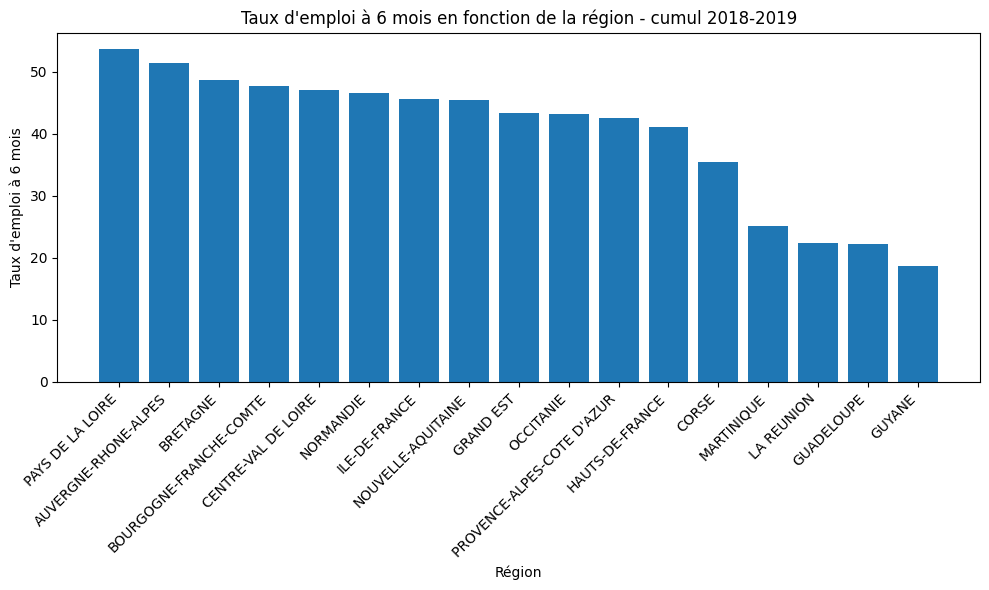

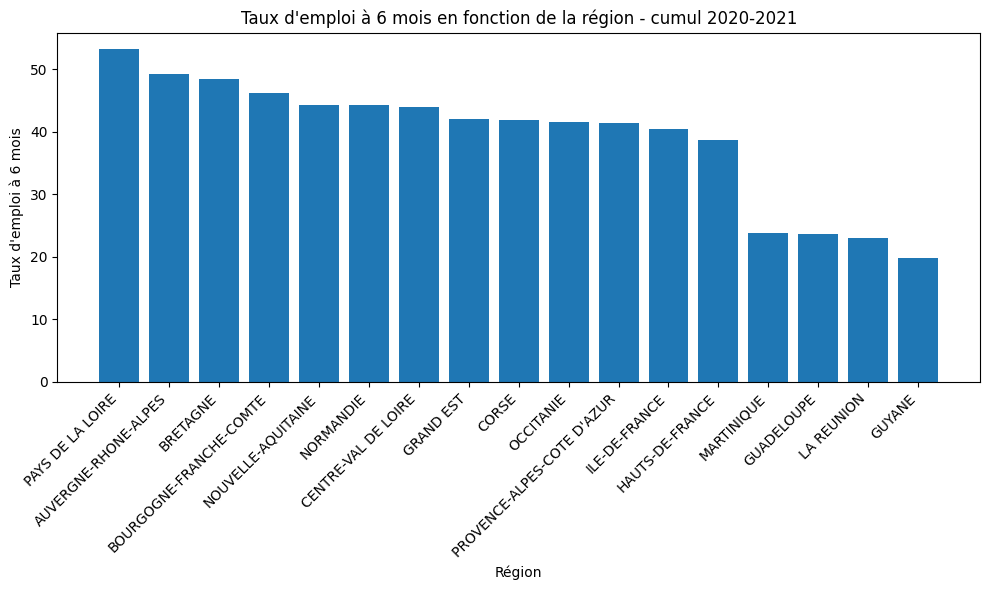

In [13]:
subject = 'taux_emploi_6_mois'
for periode in periodes:
    subset_data = data[data['annee'] == periode]
    subset_data = subset_data.groupby('region')[subject].mean().reset_index()
    subset_data = subset_data.sort_values(by=subject, ascending=False)  # Tri du DataFrame
    
    plt.figure(figsize=(10, 6))
    plt.bar(subset_data['region'], subset_data[subject])
    plt.title(f"Taux d'emploi à 6 mois en fonction de la région - {periode}")
    plt.xlabel('Région')
    plt.ylabel('Taux d\'emploi à 6 mois')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

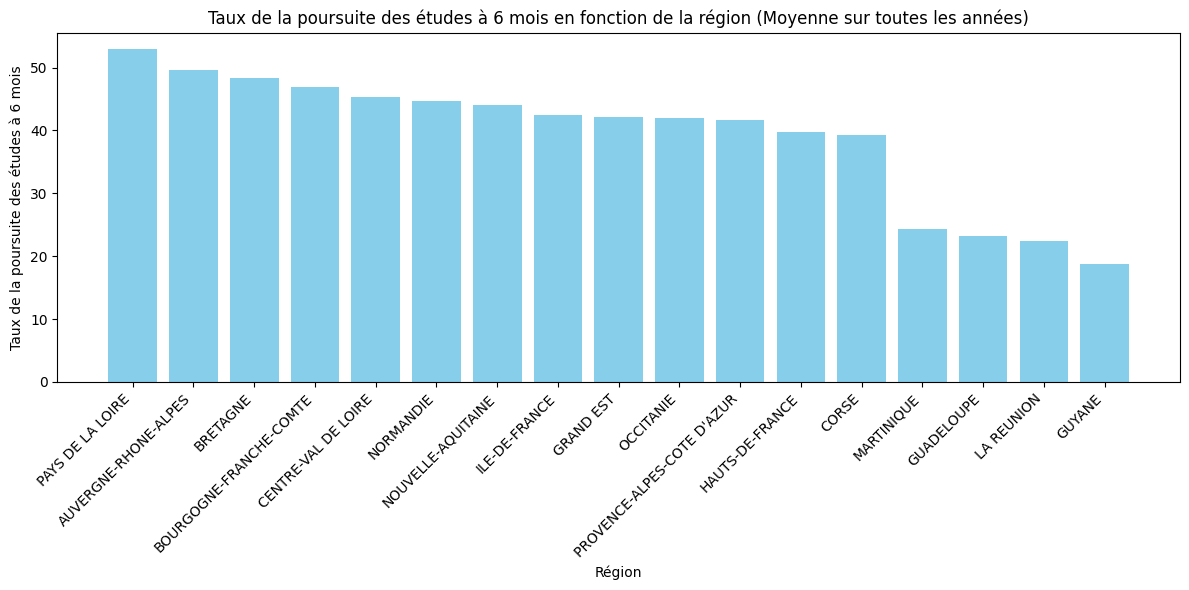

In [14]:
subject = 'taux_emploi_6_mois'
global_data = data.groupby('region')[subject].mean().reset_index()
global_data = global_data.sort_values(by=subject, ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(global_data['region'], global_data[subject], color='skyblue')
plt.title('Taux de la poursuite des études à 6 mois en fonction de la région (Moyenne sur toutes les années)')
plt.xlabel('Région')
plt.ylabel('Taux de la poursuite des études à 6 mois')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

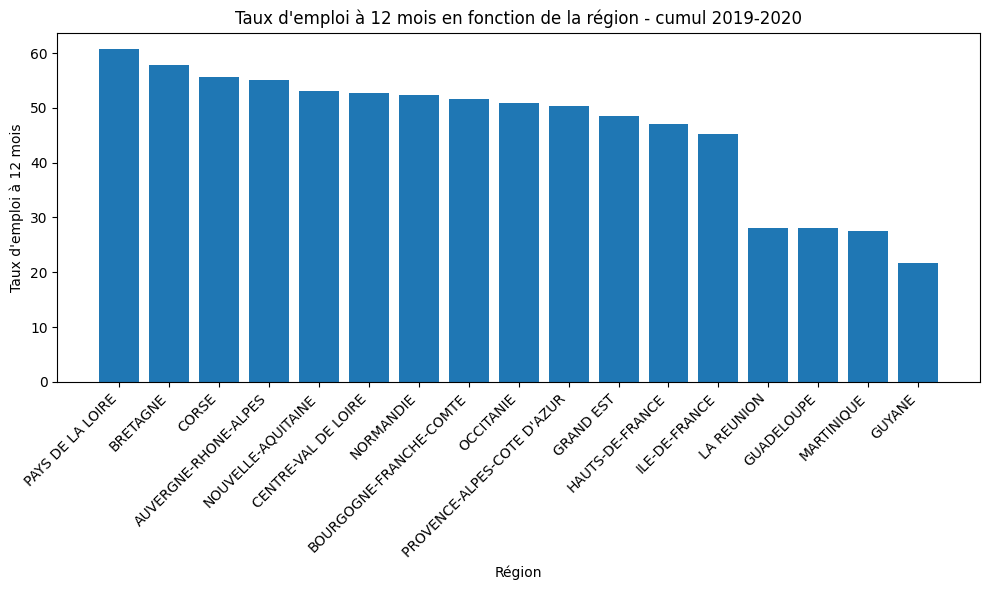

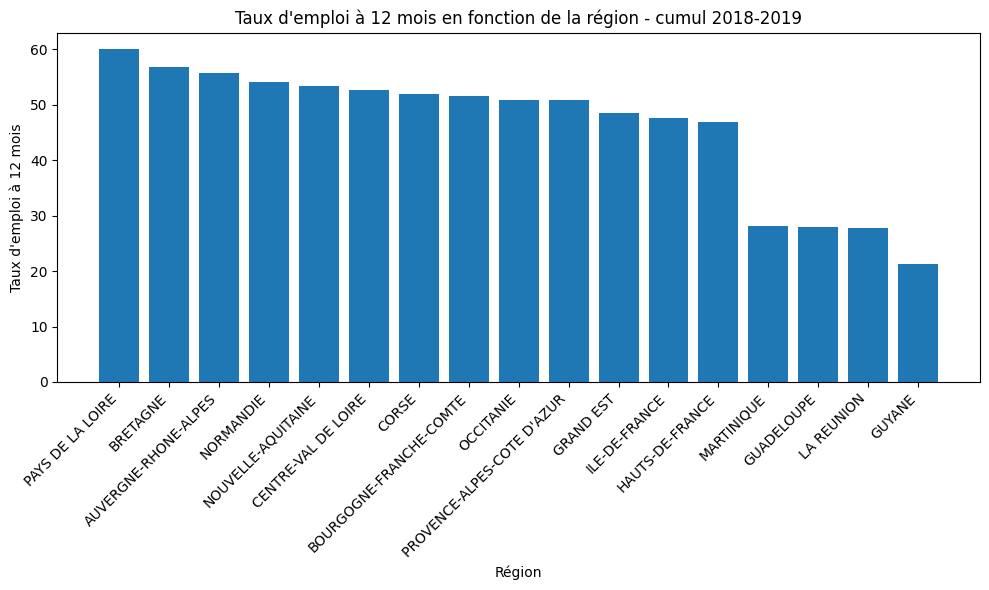

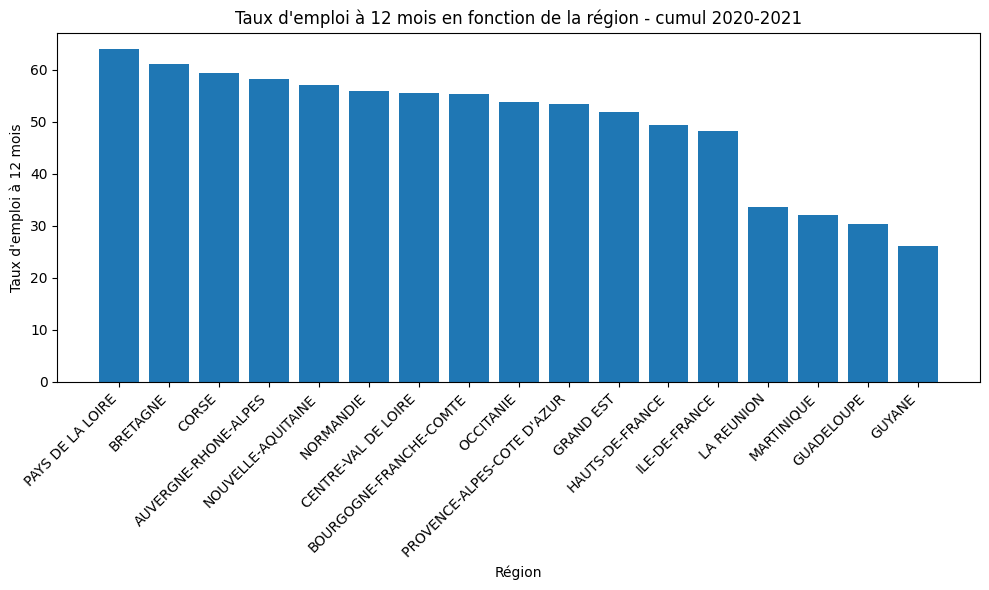

In [15]:
subject = 'taux_emploi_12_mois'
for periode in periodes:
    subset_data = data[data['annee'] == periode]
    subset_data = subset_data.groupby('region')[subject].mean().reset_index()
    subset_data = subset_data.sort_values(by=subject, ascending=False)  # Tri du DataFrame
    
    plt.figure(figsize=(10, 6))
    plt.bar(subset_data['region'], subset_data[subject])
    plt.title(f"Taux d'emploi à 12 mois en fonction de la région - {periode}")
    plt.xlabel('Région')
    plt.ylabel('Taux d\'emploi à 12 mois')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

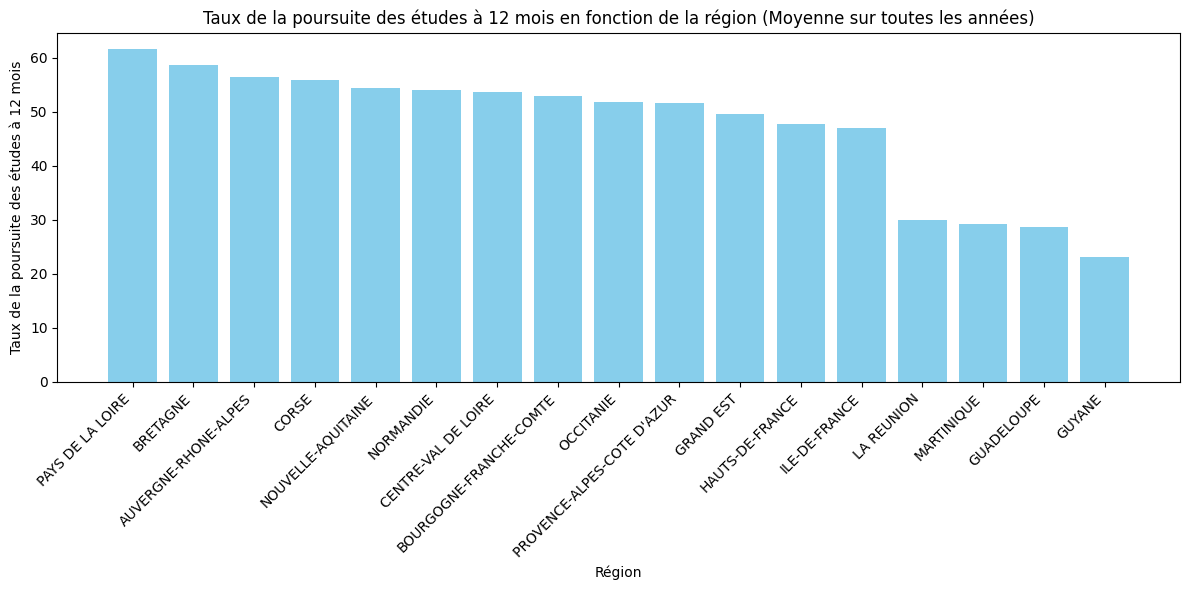

In [16]:
subject = 'taux_emploi_12_mois'
global_data = data.groupby('region')[subject].mean().reset_index()
global_data = global_data.sort_values(by=subject, ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(global_data['region'], global_data[subject], color='skyblue')
plt.title('Taux de la poursuite des études à 12 mois en fonction de la région (Moyenne sur toutes les années)')
plt.xlabel('Région')
plt.ylabel('Taux de la poursuite des études à 12 mois')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

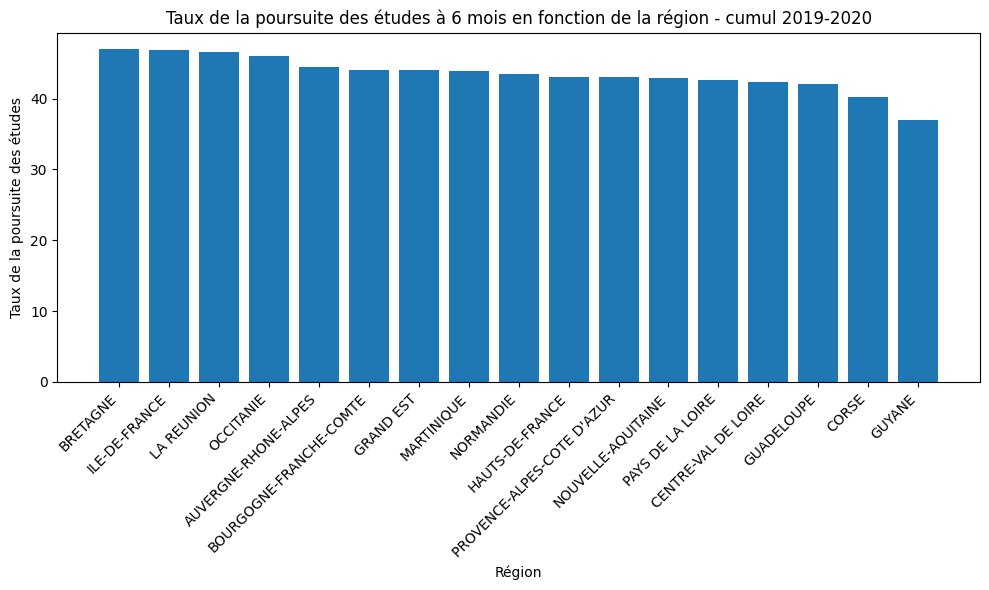

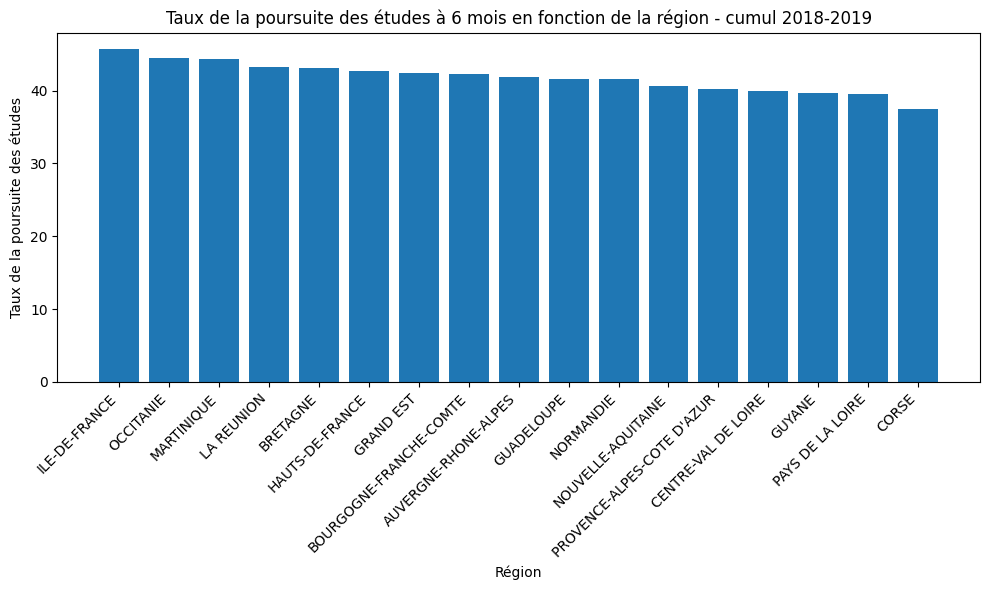

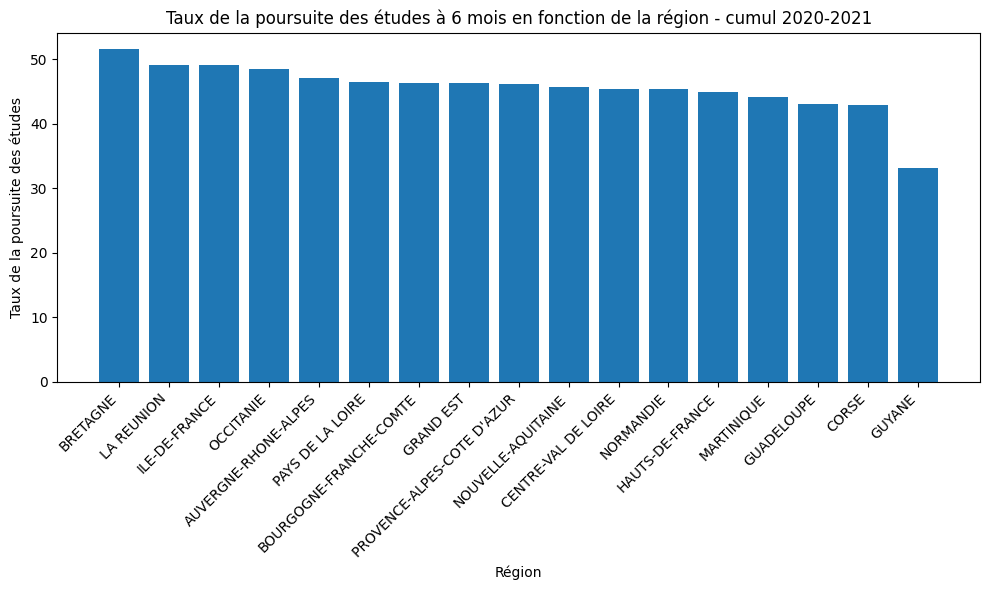

In [17]:
subject = 'taux_poursuite_etudes'
for periode in periodes:
    subset_data = data[data['annee'] == periode]
    subset_data = subset_data.groupby('region')[subject].mean().reset_index()
    subset_data = subset_data.sort_values(by=subject, ascending=False)  # Tri du DataFrame
    
    plt.figure(figsize=(10, 6))
    plt.bar(subset_data['region'], subset_data[subject])
    plt.title(f"Taux de la poursuite des études à 6 mois en fonction de la région - {periode}")
    plt.xlabel('Région')
    plt.ylabel('Taux de la poursuite des études')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

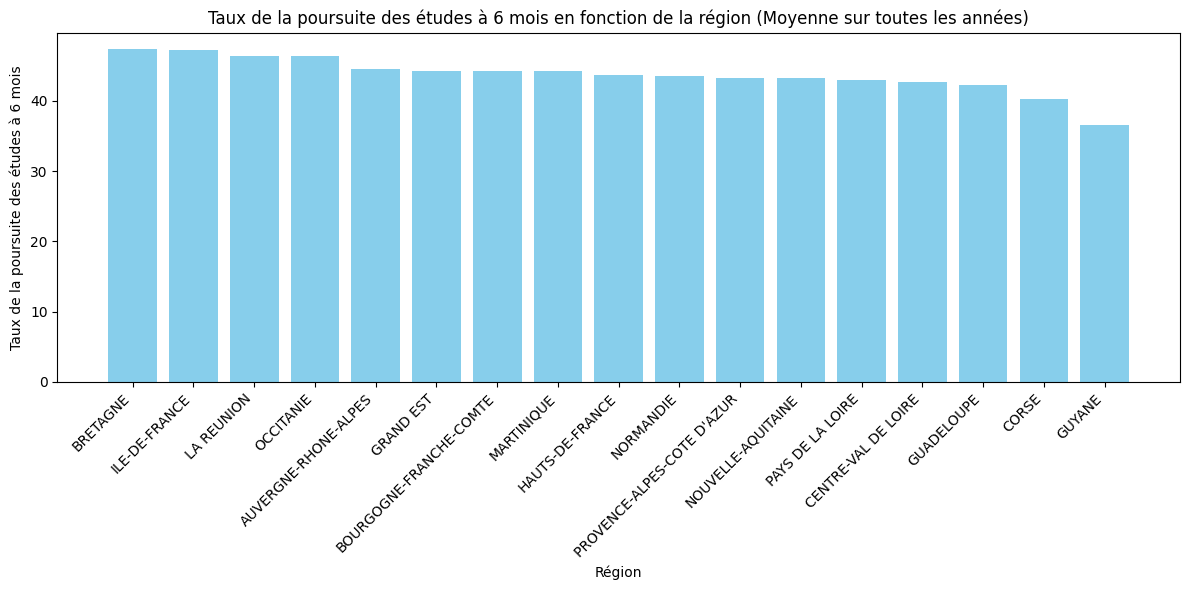

In [18]:
subject = 'taux_poursuite_etudes'
global_data = data.groupby('region')[subject].mean().reset_index()
global_data = global_data.sort_values(by=subject, ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(global_data['region'], global_data[subject], color='skyblue')
plt.title('Taux de la poursuite des études à 6 mois en fonction de la région (Moyenne sur toutes les années)')
plt.xlabel('Région')
plt.ylabel('Taux de la poursuite des études à 6 mois')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()